In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# specify the date parsing format
date_format = '%m/%d'

# loading and visualizing dataset into a dataframe
df = pd.read_csv('/kaggle/input/cloud-coverage-detection/train.csv', index_col='DATE (MM/DD)', parse_dates=True, date_format=date_format, dtype={1:'str'})
df.head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
DATE (MM/DD),,,,,,,,,,,,,,,,
01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0


<Axes: xlabel='DATE (MM/DD)'>

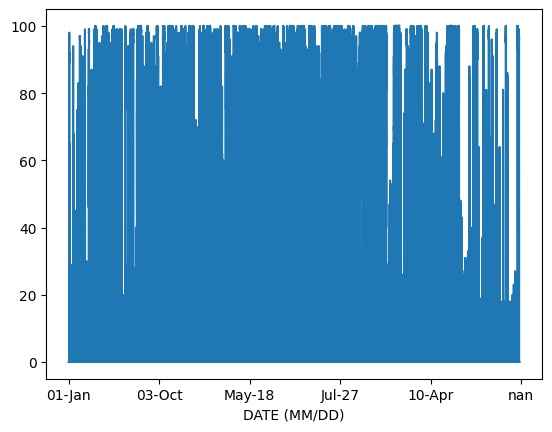

In [3]:
# plotting the cloud cover % wrt date (has missing values)
df['Total Cloud Cover [%]'].plot(kind='line')

In [4]:
# check missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

MST                                      44640
Global CMP22 (vent/cor) [W/m^2]          44640
Direct sNIP [W/m^2]                      44640
Azimuth Angle [degrees]                  44640
Tower Dry Bulb Temp [deg C]              44640
Tower Wet Bulb Temp [deg C]              44640
Tower Dew Point Temp [deg C]             44640
Tower RH [%]                             44640
Total Cloud Cover [%]                    46109
Peak Wind Speed @ 6ft [m/s]              44640
Avg Wind Direction @ 6ft [deg from N]    44640
Station Pressure [mBar]                  44640
Precipitation (Accumulated) [mm]         44640
Snow Depth [cm]                          44640
Moisture                                 44640
Albedo (CMP11)                           44640
dtype: int64


In [5]:
# imputation of target feature and feature selection for inputs
cols_to_use = ['Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]', 'Tower Dry Bulb Temp [deg C]', 
               'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]', 'Tower RH [%]',
               'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
               'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Albedo (CMP11)']

X = df[cols_to_use]
y = df['Total Cloud Cover [%]']

# calculate median excluding NaN values
median_y = y.median()

# impute NaN values with median
y_imputed = y.fillna(median_y)

In [6]:
# train test split
len(df)

train = df.iloc[:398593]
test = df.iloc[398593:498241]

X_train = train[cols_to_use]
X_test = test[cols_to_use]
y_train = train['Total Cloud Cover [%]']
y_test = test['Total Cloud Cover [%]']

In [7]:
# imports
from sklearn.impute import SimpleImputer

# imputing input features
imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

<Axes: xlabel='DATE (MM/DD)'>

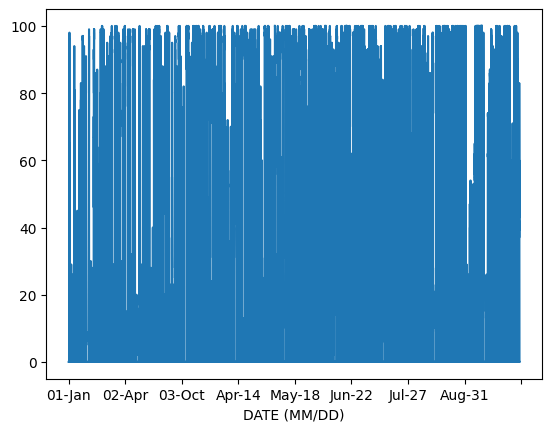

In [9]:
# plotting the cloud cover % wrt date (after imputations)
y_train.plot(x=X_train, kind='line')